In [1]:
from tensorflow import keras

2024-02-23 22:11:17.596620: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-23 22:11:17.624203: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 22:11:17.624238: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 22:11:17.624956: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-23 22:11:17.630387: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
#from ann_visualizer.visualize import ann_viz
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
from keras.callbacks import CSVLogger

In [4]:
csv_logger = CSVLogger("model_history_log.csv", append=True)

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
#loding the images
#train_images = mnist.train_images()
#train_labels = mnist.train_labels()
print(len(train_labels))
#test_images = mnist.test_images()
#test_labels = mnist.test_labels()
print(len(test_labels))

60000
10000


In [7]:
# Normalize the images. Pixel values are between 0-255 in image learning it is
# good practice to normalize your data to a smaller range like between 0 and 1.
train_images = (train_images / 255) - 0.5
#print(train_images)
test_images = (test_images / 255) - 0.5
#print(test_images)


In [8]:
#lets give the hyper parameters
num_filters = 1
filter_size = 9
pool_size = 2

In [9]:
# Model is being trained on 1875 batches of 32 images each, not 1875 images. 1875*
# Build the model.
model = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(10, activation='softmax'),
])

2024-02-23 22:11:20.301511: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-23 22:11:20.324325: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-23 22:11:20.324370: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-23 22:11:20.326788: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-23 22:11:20.326840: I external/local_xla/xla/stream_executor

In [10]:
# Compile the model.
model.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [11]:
tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    )


In [12]:
callback_1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

In [13]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [14]:
# Train the model.
history = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=10,
    validation_data=(test_images, to_categorical(test_labels)),
    callbacks=[csv_logger, callback_1],
)


Epoch 1/10


2024-02-23 22:11:21.769730: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-23 22:11:21.920263: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-23 22:11:22.729880: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fdb306ffbe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-23 22:11:22.729927: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-02-23 22:11:22.736470: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-23 22:11:22.837283: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
I0000 00:00:1708706482.881542    5535 devic

1875/1875 [==============================] - 11s 5ms/step - loss: 0.5625 - accuracy: 0.8358 - val_loss: 0.3546 - val_accuracy: 0.9005
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3507 - accuracy: 0.8992 - val_loss: 0.3197 - val_accuracy: 0.9093
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3202 - accuracy: 0.9074 - val_loss: 0.2970 - val_accuracy: 0.9192
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3015 - accuracy: 0.9136 - val_loss: 0.2898 - val_accuracy: 0.9183
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2888 - accuracy: 0.9173 - val_loss: 0.2792 - val_accuracy: 0.9224
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2793 - accuracy: 0.9194 - val_loss: 0.2723 - val_accuracy: 0.9208
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2718 - accuracy: 0.9209 - val_loss: 0.2673 - val_accuracy: 0.9253
Ep

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 1)         82        
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 1)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 1092 (4.27 KB)
Trainable params: 1092 (4.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
#Save the model:
model.save_weights('cnn.h5')

In [17]:
model.load_weights('cnn.h5')

In [18]:
predictions = model.predict(test_images[:10])

1/1 [==============================] - 0s 198ms/step


In [19]:
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

[7 2 1 0 4 1 4 9 6 9]


In [20]:
print(test_labels[:10]) # [7, 2, 1, 0, 4]

[7 2 1 0 4 1 4 9 5 9]


In [21]:
#Callback records events into a History object.
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [22]:
#The range of epochs, from 1 to the total number of epochs, is often used to plot 
#the range function is used to generate a list of integers from 1 to the length of
# This is because the accuracy list is typically recorded at the end of each epoch
epochs = range(1, len(accuracy) + 1)

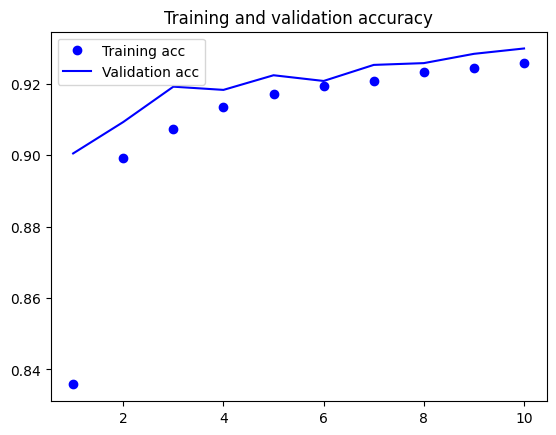

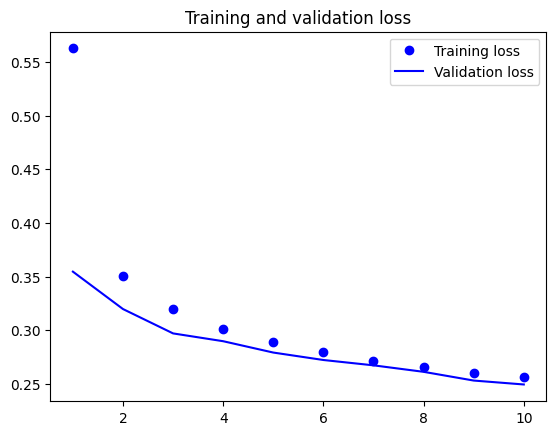

In [23]:
plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Model

In [26]:
def grad_cam(model, img, layer_name="conv2d_3", label_name=None, category_id=None):
    """Get a heatmap by Grad-CAM.
    Args:
        model: A model object, build from tf.keras 2.X.
        img: An image ndarray.
        layer_name: A string, layer name in model.
        label_name: A list or None,
            show the label name by assign this argument,
            it should be a list of all label names.
        category_id: An integer, index of the class.
            Default is the category with the highest score in the prediction.
    Return:
        A heatmap ndarray(without color).
    """
    img_tensor = np.expand_dims(img, axis=0)
    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])
    with tf.GradientTape() as gtape:
        conv_output, predictions = heatmap_model(img_tensor)
        if category_id is None:
            category_id = np.argmax(predictions[0])
        if label_name is not None:
            print(label_name[category_id])
        output = predictions[:, category_id]
        grads = gtape.gradient(output, conv_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat
    return np.squeeze(heatmap)

In [27]:
def grad_cam_plus(model, img, layer_name="conv2d_3", label_name=None, category_id=None):
    """Get a heatmap by Grad-CAM++.
        10/02/2024, 23:27 visualisation_cnn_mnist.ipynb - Colaboratory
        https://colab.research.google.com/drive/1kzBPbwmHM2EF_GZUiTMkrDd3MJnVFLJF#printMode=true 8/11
    Args:
        model: A model object, build from tf.keras 2.X.
        img: An image ndarray.
        layer_name: A string, layer name in model.
        label_name: A list or None,
            show the label name by assign this argument,
            it should be a list of all label names.
        category_id: An integer, index of the class.
            Default is the category with the highest score in the prediction.
    Return:
        A heatmap ndarray(without color).
    """
    img_tensor = np.expand_dims(img, axis=0)
    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])
    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                    print(category_id)
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)
    global_sum = np.sum(conv_output, axis=(0, 1, 2))
    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)
    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant
    weights = np.maximum(conv_first_grad[0], 0.0)
    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)
    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat
    return heatmap

In [28]:
import requests
import os
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import get_file

## The VGG model already available and trained for medical dataset.


In [29]:
WEIGHTS_PATH_VGG16_MURA = "https://github.com/samson6460/tf_keras_gradcamplusplus/releases/download/Weights/tf_keras_vgg16_mura_model.h5"

def vgg16_mura_model():
    """Get a vgg16 model.

    The model can classify bone X-rays into three categories:
    wrist, shoulder and elbow.
    It will download the weights automatically for the first time.

    Return:
        A tf.keras model object.
    """
    path_weights = get_file(
        "tf_keras_vgg16_mura_model.h5",
        WEIGHTS_PATH_VGG16_MURA,
        cache_subdir="models")

    model = load_model(path_weights)

    return model


def preprocess_image(img_path, target_size=(224, 224)):
    """Preprocess the image by reshape and normalization.

    Args:
        img_path: A string.
        target_size: A tuple, reshape to this size.
    Return:
        An image array.
    """
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img /= 255

    return img


def show_imgwithheat(img_path, heatmap, alpha=0.4, return_array=False):
    """Show the image with heatmap.

    Args:
        img_path: string.
        heatmap: image array, get it by calling grad_cam().
        alpha: float, transparency of heatmap.
        return_array: bool, return a superimposed image array or not.
    Return:
        None or image array.
    """
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = (heatmap*255).astype("uint8")
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype("uint8")
    superimposed_img = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

    imgwithheat = Image.fromarray(superimposed_img)
    try:
        display(imgwithheat)
    except NameError:
        imgwithheat.show()

    if return_array:
        return superimposed_img

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 1)         82        
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 1)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 1092 (4.27 KB)
Trainable params: 1092 (4.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
heatmap = grad_cam(model, test,
                label_name = ['WRIST', 'ELBOW', 'SHOULDER'],
                #category_id = 0,
                )


NameError: name 'test' is not defined